In [33]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd
from mealpy import FloatVar
from estrategias import *


In [14]:
# ======================
#  CARGAR DATOS N STUFF
# ======================

results_strategies = {}
estrategias=['2sma','bollinger','macdx','Rsi']
for estrategia in estrategias:
    with open(f'logs/resultados_finales_{estrategia}.pickle','rb') as file:
        resultados = pickle.load(file)
        results_strategies[estrategia] = [ resultado['current_fitness'] for resultado in resultados ]
    

In [30]:
# =====================
# PRUEBA ESTADISTICA
# =====================
comparacion = np.zeros((4,4))
for i1 in range(4):
    for i2 in range(4):
        e1 = results_strategies[estrategias[i1]]
        e2 = results_strategies[estrategias[i2]]
        std, pvalue = mannwhitneyu(e1, e2, alternative="greater")
        comparacion[i1,i2] = round(pvalue,3)

df = pd.DataFrame(data={'-':['2sma','bollinger_rsi','macd_adx','rsi_2sma'],
                                '2sma':comparacion[:,0],
                                'bollinger_rsi':comparacion[:,1],
                                'macd_adx':comparacion[:,2],
                                'rsi_2sma':comparacion[:,3]})

-   2sma  bollinger_rsi  macd_adx  rsi_2sma
0           2sma  0.503          1.000     1.000     1.000
1  bollinger_rsi  0.000          0.503     1.000     0.979
2       macd_adx  0.000          0.000     0.503     0.000
3       rsi_2sma  0.000          0.022     1.000     0.503

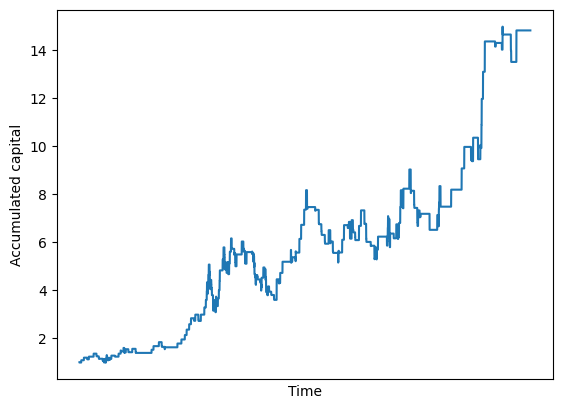

In [51]:
symbol = 'BTCUSDT'
tempo = '5m'
len_sim = 2*30*24*12  # 2meses x 30dias x 24hrs x 12mediciones/hr
obj_weights = [1,-1/10]

bound_2sma = FloatVar(lb = (5,    6,  0.90,  1.001, 1.001, 0.90), ub = (288, 288, 0.999, 1.1,   1.1,   0.999))
_2sma_ = SMA2(symbol, tempo, len_sim, bounds = bound_2sma, minmax = "max", strategy_name = '2sma', obj_weights = obj_weights)


with open(f'logs/resultados_finales_2sma.pickle','rb') as file:
    resultados = pickle.load(file)

_2sma_.performance_graph( resultados[2]['current_position'] )